# Домашнее задание 3. Математика для data sciense. Нетология.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Задача №1. Решить систему линейных уравнений:

![alt text](https://italiandirectory.eu/wp-content/ql-cache/quicklatex.com-34a5602e13176cbddcfd35cca34478fe_l3.svg)

In [2]:
a = np.array([[2,1,1], [1,3,2], [1,0,0]])
b = np.array([4,5,6])
x = np.linalg.solve(a, b)
x

array([  6.,  15., -23.])

In [3]:
# Второй способ с помощью обратной матрицы

In [4]:
A_inv = np.linalg.inv(a)
A_inv

array([[ 0.,  0.,  1.],
       [-2.,  1.,  3.],
       [ 3., -1., -5.]])

In [5]:
x=A_inv@b
x

array([  6.,  15., -23.])

In [6]:
# То есть a = 6, b = 15, c = -23

Задача №2. Анна выбирает тарифный план для телефонной связи. Первый план, T1, стоит 20 долларов в месяц, каждый звонок стоит 25 центов в минуту. Второй тарифный план, T2, стоит 40долларов в месяц, но звонки стоят 8 центов в минуту. Какой план ей выбрать, если Анна звонит не более 117 минут в месяц?

Составим задачу в системе линейных уравнений.

Количество минут - независимая переменная, будет нашим x. Стоимость тарифа - зависимая величина, будет нашим y.

Написать систему уравнений для данной задачи, построить график, найти точку пересечения прямых. Сделать вывод о том, какой тариф использовать лучше для Анны.




In [7]:
# Так как Анна звонит <= 117 минут, то x<=117. Значит:
x = 117

# 1-ое уравнение:  
y1 = 0.25*x + 20 

# 2-ое уравнение:  
y2 = 0.08*x + 40

print("Первый тарифный план = ", y1)
print("Второй тарифный план = ", y2)

Первый тарифный план =  49.25
Второй тарифный план =  49.36


In [8]:
# Для Анны лучше использовать первый тарифный план. 
# Если Анна будет говорить меньше 117 минут, то цена тарифного плана №1 будет быстрее уменьшаться. 

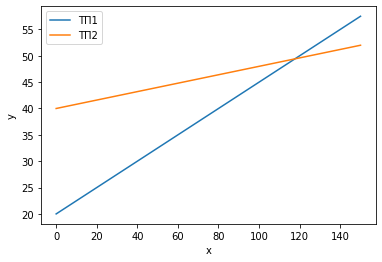

In [9]:
x = np.linspace(0, 150, 100)                     
y1 = 0.25*x + 20
y2 = 0.08*x + 40

plt.plot(x, y1) 
plt.plot(x, y2) 

plt.xlabel('x')
plt.ylabel('y')
plt.legend(["ТП1", "ТП2"], loc='upper left')

plt.show()

In [10]:
# Не очень понимаю, зачем здесь нужны графики, если выводы можно сделать без них

Задача №3. Загрузить датасет Boston houses. Выбрать 3-хмерное пространство (3 атрибута из таблицы), взять 3 дома по данному трехмерному пространству, доказать, что данные векторы не компланарны.

In [11]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
price = boston_dataset.target

In [12]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
a = np.array(boston.loc[0,['RM', 'AGE', 'TAX']])
b = np.array(boston.loc[1,['RM', 'AGE', 'TAX']])
c = np.array(boston.loc[2,['RM', 'AGE', 'TAX']])
print(a,b,c)

[  6.575  65.2   296.   ] [  6.421  78.9   242.   ] [  7.185  61.1   242.   ]


In [14]:
d = np.hstack((np.transpose([a]), np.transpose([b]), np.transpose([c])))
print(d)

[[  6.575   6.421   7.185]
 [ 65.2    78.9    61.1  ]
 [296.    242.    242.   ]]


In [15]:
print(np.linalg.det(d))

-11296.558799999997


In [16]:
# Так как определитель не равен 0, то данные вектора - не компланарны. 

Задача №4. Для матрицы, полученной на предыдущей задачи, посчитать собственный вектор(v). Умножить собственный вектор на матрицу (Av). Сделать график. Во сколько раз Av отличается от v?

In [17]:
d

array([[  6.575,   6.421,   7.185],
       [ 65.2  ,  78.9  ,  61.1  ],
       [296.   , 242.   , 242.   ]])

In [18]:
e_vals, e_vecs = np.linalg.eig(d)
e_vecs

array([[-0.02785618, -0.51080419,  0.05008794],
       [-0.25756775, -0.2157241 , -0.7154491 ],
       [-0.96585863,  0.8321912 ,  0.69686712]])

In [19]:
v = e_vecs[:, 0]
v

array([-0.02785618, -0.25756775, -0.96585863])

In [20]:
Av = d@v
Av

array([  -8.77669115,  -81.15228061, -304.31461285])

In [21]:
Av/v

array([315.07158956, 315.07158956, 315.07158956])

In [22]:
Av_norm = np.linalg.norm(Av)
v_norm = np.linalg.norm(v)
print(Av_norm, v_norm)

315.0715895611144 1.0


In [23]:
# Вектор Av больше v в 315 раз

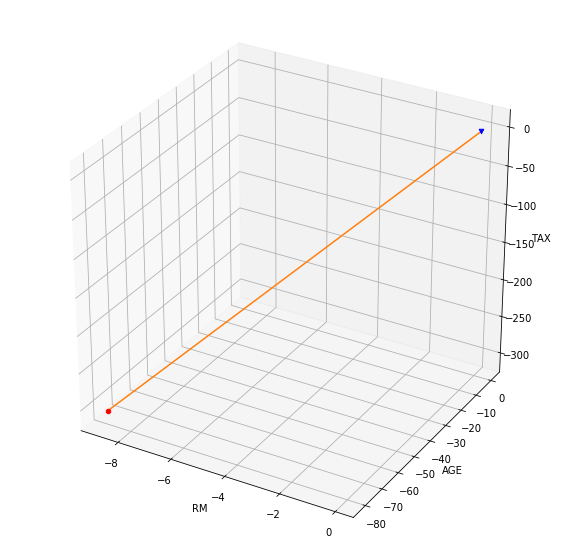

In [24]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array([v[0], Av[0]])
y = np.array([v[1], Av[1]])
z = np.array([v[2], Av[2]])


ax.plot([0,x[0]], [0,y[0]], [0,z[0]])
ax.plot([0,x[1]], [0,y[1]], [0,z[1]])

ax.scatter(x[0], y[0], z[0], c='b', marker='v')
ax.scatter(x[1], y[1], z[1], c='r', marker='o')

ax.set_xlabel('RM')
ax.set_ylabel('AGE')
ax.set_zlabel('TAX')

plt.show()

Задача №5. Как посчитать интеграл полинома, полученного в домашнем задании №2, при полиномиальной регрессии?

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
price = boston_dataset.target
  
x = boston.LSTAT

x = np.array(x).reshape(-1, 1)
y = price

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x) 
  
p = poly.fit(X_poly, y) 
lin2 = LinearRegression()
model = lin2.fit(X_poly, y)
print(p.get_params())
print(p.get_feature_names())
print(p.powers_)
print(model.coef_ , model.intercept_)

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}
['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']
[[0 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [2 0 0]
 [1 1 0]
 [1 0 1]
 [0 2 0]
 [0 1 1]
 [0 0 2]]
[ 0.         -2.3328211   0.04354689] 42.86200732816938


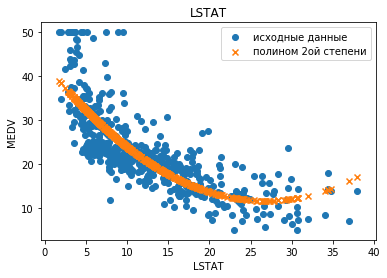

In [26]:
y_pred = model.predict(poly.fit_transform(x))
plt.scatter(x, y, marker='o')
plt.scatter(x, y_pred, marker='x')
plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(['исходные данные', 'полином 2ой степени'])
plt.show()

In [27]:
import scipy.integrate as spint
def f(x):
    return 0.04354689*x**2-2.3328211*x+42.86200732816938
a = min(x)
b = max(x)
print(spint.quad(f,a,b))

(669.7131569651579, 7.435309667571198e-12)


In [28]:
r = np.linspace(0,40,num=100)

In [29]:
y = f(r)

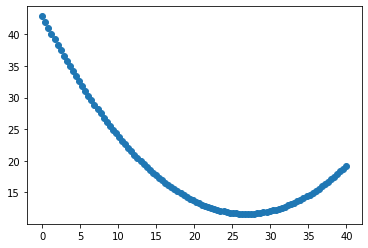

In [30]:
plt.scatter(r, y, marker='o')